<a href="https://colab.research.google.com/github/Cdhernadnezr/SignMNIST-Classifier/blob/main/signmnist_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto clasificación de imágenes MNIST**
Se trata de un conjunto de datos MNIST adaptado para representar gestos manuales del alfabeto en lengua de señas americana (ASL). Este conjunto plantea un problema de clasificación multiclase con 24 categorías, correspondientes a las letras del alfabeto (excluyendo la "J" y la "Z", ya que requieren movimiento). El conjunto de datos incluye 27,455 imágenes para entrenamiento y 7,172 para prueba. Cada imagen es de 28 x 28 píxeles en escala de grises, con valores de intensidad que varían entre 0 y 255.

##**Frame the problem and look at the Big Picture** || **Enmarca el problema y mira el panorama general**


El propósito de este sistema es contribuir al desarrollo de soluciones accesibles que permitan la interpretación automatizada de lengua de señas, facilitando la comunicación entre personas sordas y oyentes en diversos entornos. Entre las posibles aplicaciones se encuentran asistentes virtuales inclusivos, herramientas educativas y sistemas de traducción en tiempo real para dispositivos móviles o cámaras.

Desde una perspectiva técnica, se trata de un problema de clasificación supervisada. El enfoque inicial considera métricas como la precisión (accuracy) y el F1-score macro para evaluar el desempeño, especialmente si se presentan desequilibrios en clases futuras.

##**Get the data** || **Obtener los datos**

In [39]:
#Librerías
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
#Figuras más bonitas
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Para este caso, se utilizó el dataset MNIST a través de la función `fetch_openml`, la cual forma parte del módulo `datasets` de la biblioteca `sklearn`. Esta función permite descargar datasets desde la plataforma OpenML de manera sencilla.

Nos trae el dataset como DataFrame pero para imágenes es preferible configurarlo como `as_frame=False` para que los datos se obtengan como arrays de NumPy.

In [40]:
mnist = fetch_openml('SignMNIST', as_frame=False) #se utiliza as_frame=False para obtener los datos como array de NumPy y no como DataFrames de Pandas.

## **Explore the data || Explorar los datos**

In [41]:
print(mnist.DESCR)

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications.
The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1, pixel2 ... pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.
The train and test data have been concatenated and can be retrieved by selecting the first 27,455 rows for train and the last 7172 for test.

Downloaded from openml.org.


In [42]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [43]:
#se convierte a una matriz NumPy 2D
X, y = mnist.data, mnist.target
X

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]])

In [44]:
X.shape

(34627, 784)

In [45]:
y

array([3, 6, 2, ..., 2, 4, 2])

In [46]:
y.shape

(34627,)

Hay 34627 imágenes, y cada una tiene 784 características. Esto se debe a que cada imagen tiene 28 × 28 píxeles, y cada característica simplemente representa la intensidad de un píxel, de 0 (blanco) a 255 (negro)

Se muestra con imshow() usamos cmap="binary para obtener mapa de color en escala de grises

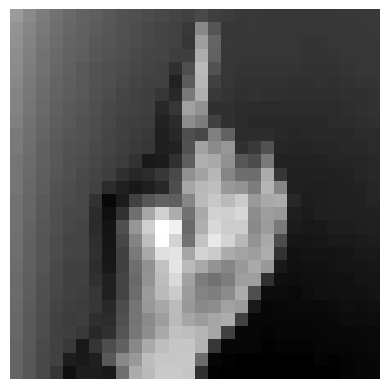

In [65]:
def plot_letter(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_letter = X[0]
plot_letter(some_letter)
plt.show()

In [48]:
y[0]

np.int64(3)

Nos indica que es una D ya que A=0, B=1,...D=3 y parece esta seña

algunas imágenes más del conjunto de datos MNIST

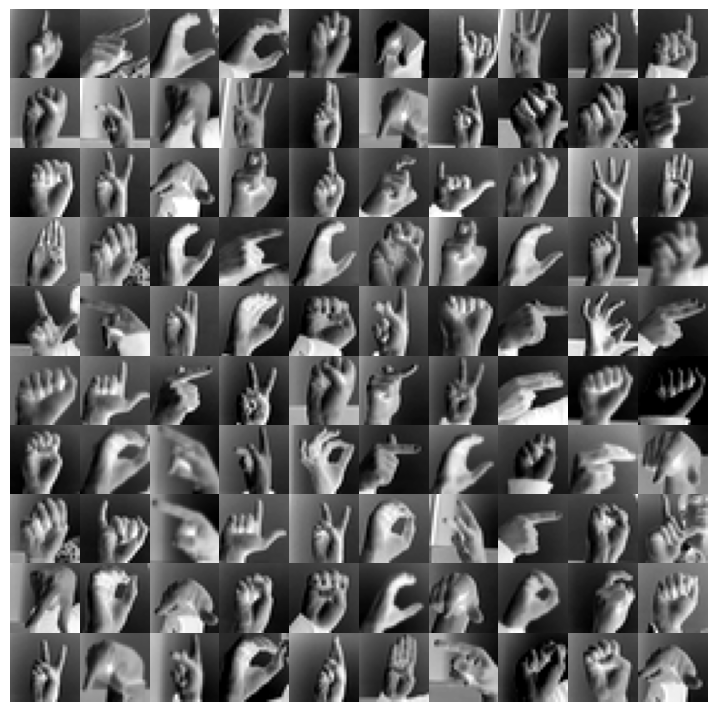

In [49]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

##**Prepare the Data ||  Preparar los datos**

crear un conjunto de prueba y reservarlo antes de inspeccionar los datos con detenimiento. Sabemos que los datos de entrenamiento son 27455 casos y los datos de prueba son 7172 casos. Como vimos ya está mezclado el conjunto.

In [50]:
X_train, X_test, y_train, y_test = X[:27455], X[27455:], y[:27455], y[27455:]

##**Shortlist Promising Models || Lista corta de modelos prometedores**

##**Fine-Tune the System || Afinar el sistema**

Simplifiquemos el problema por ahora e intentemos identificar sólo una letra: por ejemplo la letra A

In [70]:
y_train_d = (y_train == 3)  # Verdadero para todos las A (0), falso para todas las demas letras
y_test_d = (y_test == 3)

Ahora escojamos un clasificador y entrenémoslo
clasificador de descenso de gradiente estocástico (SGD, o GD estocástico) ->  es capaz de gestionar conjuntos de datos muy grandes de forma eficiente, lo hace ideal para el aprendizaje en línea.

In [71]:
sgd_clf = SGDClassifier(random_state=42) #Repetibilidad
sgd_clf.fit(X_train, y_train_d) #entrenamiento

SGDClassifier(random_state=42)

Ahora podemos usarlo para detectar imágenes de la seña para la letra D:

In [72]:
sgd_clf.predict([some_letter])

array([ True])

Medición de la precisión mediante validación cruzada


##**Present Your Solution || Presenta tu solución**

##**Launch || Lanzamiento**